In [2]:
import harmony

findfont: Font family ['Raleway'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Lato'] not found. Falling back to DejaVu Sans.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as npn
import scanpy.external as sce
import numpy as np

In [2]:
plt.rcParams['font.family'] = "sans-serif"

In [3]:
sc.settings.verbosity = 3  
# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

-----
anndata     0.8.0
scanpy      NA
sinfo       0.3.1
-----
PIL                 8.1.1
anndata             0.8.0
anyio               NA
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
brotli              NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
fasteners           NA
future_fstrings     NA
google              NA
h5py                3.9.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server  

In [4]:
# samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "11hr": "A0008_046", "12hr": "A0021_046"}

In [5]:
s_genes = list(pd.read_csv("./../../../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [3]:
granulosa = sc.read_h5ad("./../../pyobjs_github/granulosa_individual_combined_newscaling.h5ad")
granulosa

AnnData object with n_obs × n_vars = 63849 × 31053
    obs: 'barcode', 'x', 'y', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'n_counts', 'individual_leiden_1.0', 'individual_leiden_1.2', 'individual_leiden_1.5', 'Sample', 'S_score', 'G2M_score', 'phase', 'leiden_1.0', 'leiden_1.5', 'Level1_total_abundance', 'Level1_EN_Blood', 'Level1_EN_Lymph', 'Level1_Epithelium', 'Level1_GC_Antral', 'Level1_GC_Atretic', 'Level1_GC_CL_Active', 'Level1_GC_CL_Lytic', 'Level1_GC_Estrous', 'Level1_GC_Mitotic', 'Level1_GC_Mural', 'Level1_GC_Preantral', 'Level1_I_B_Cell', 'Level1_I_Dendritic_Cell', 'Level1_I_Granulocyte', 'Level1_I_Macrophage', 'Level1_I_T_Cell', 'Level1_M_Cortical Stroma', 'Level1_M_Dividing Mesenchyme', 'Level1_M_Immature Theca', 'Level1_M_Medullary Stroma', 'Level1_M_Pericyte', 'Level1_M_Smooth Muscle', 'Level1_M_Steroidogenic Theca', 'Level1_Oocyte', 'Level1_max_pred', 'Level1_max_pred_celltype', 'Level1_max_pred_celltype_group', 'Level0_total_abundance', 'L

In [4]:
granulosa = granulosa[~granulosa.obs["granulosa_celltypes"].isin(["Others", "Mixed"])]

In [5]:
granulosa.obs["granulosa_celltypes_reduced"].cat.categories

Index(['GC_Mural-(Preantral)', 'GC_Mural-(Antral)', 'GC_Mural-(Atretic)',
       'GC_Cumulus-(Mixed)', 'GC_Mitotic-(Antral)', 'GC_Lytic-(Lytic)'],
      dtype='object')

In [174]:
# granulosa.obs["granulosa_celltypes"].cat.rename_categories({'GC_Mitotic-(Antral)':'GC_Mitotic-(Transitioning)'}, inplace = True)
# granulosa.obs["granulosa_celltypes_reduced"].cat.rename_categories({'GC_Mitotic-(Antral)':'GC_Mitotic-(Transitioning)'}, inplace = True)

/tmp/ipykernel_1081977/933414512.py:1: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  granulosa.obs["granulosa_celltypes"].cat.rename_categories({'GC_Mitotic-(Antral)':'GC_Mitotic-(Transitioning)'}, inplace = True)
/tmp/ipykernel_1081977/933414512.py:2: FutureWarning: The `inplace` parameter in pandas.Categorical.rename_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  granulosa.obs["granulosa_celltypes_reduced"].cat.rename_categories({'GC_Mitotic-(Antral)':'GC_Mitotic-(Transitioning)'}, inplace = True)


In [6]:
granulosa.obs["granulosa_celltypes_follicle_type"] = [x.split("-")[1][1:-1] for x in granulosa.obs["granulosa_celltypes_reduced"]]
granulosa.obs["granulosa_celltypes_follicle_type"] = granulosa.obs["granulosa_celltypes_follicle_type"].astype("category")
granulosa.obs["granulosa_celltypes_follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral',  'Antral', 'Atretic', 'Lytic', "Mixed"], inplace = True)

/tmp/ipykernel_1696733/3795298610.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  granulosa.obs["granulosa_celltypes_follicle_type"] = [x.split("-")[1][1:-1] for x in granulosa.obs["granulosa_celltypes_reduced"]]
/tmp/ipykernel_1696733/3795298610.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  granulosa.obs["granulosa_celltypes_follicle_type"].cat.reorder_categories(


In [8]:
granulosa.write_h5ad("./../../pyobjs_github/granulosa1.h5ad")

In [9]:
granulosa.uns['log1p'] = {'base' : None}
sc.tl.rank_genes_groups(granulosa, groupby="granulosa_celltypes_reduced", key_added="rank_gene_groups_granulosa_celltypes_reduced", pts=True)
sc.tl.dendrogram(granulosa, "granulosa_celltypes_reduced")

/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font famil

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: Font family 'Bitstream Vera Sans' not found.
findfont: 

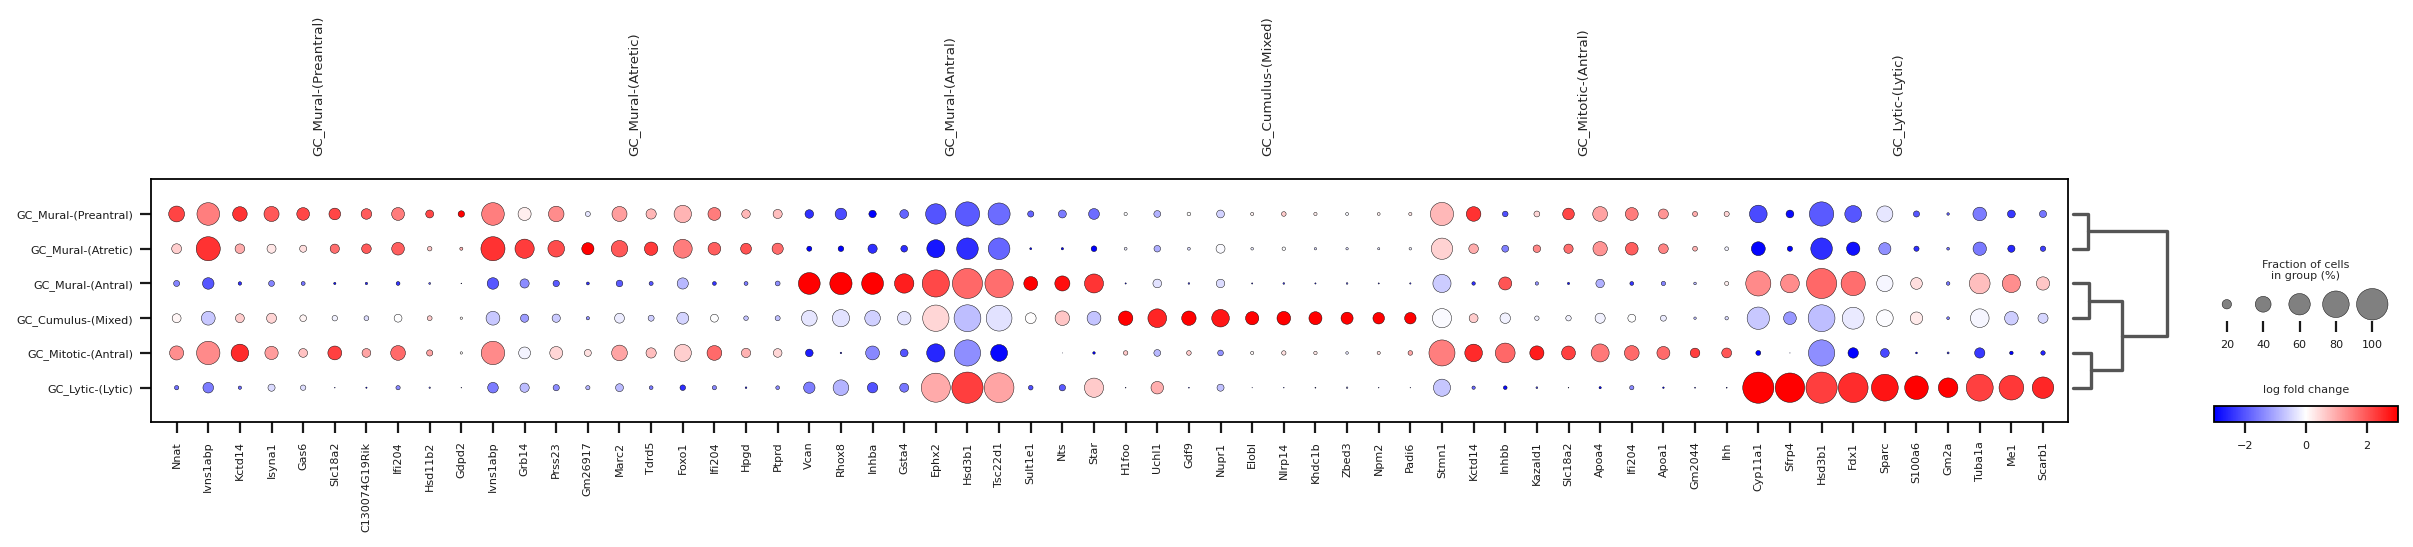

In [10]:
sc.settings.set_figure_params(dpi=80, fontsize=6, facecolor='white', frameon=True, figsize=(5, 5))
sc.pl.rank_genes_groups_dotplot(granulosa, n_genes=10, key="rank_gene_groups_granulosa_celltypes_reduced", values_to_plot='logfoldchanges', cmap='bwr', min_logfoldchange=1.5, vmax=3, vmin=-3, save=  "granulosa_alldata_subtype_markers", figsize = (18,2.0))
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [12]:
granulosa.write_h5ad("./../../pyobjs_github/granulosa1.h5ad")

In [6]:
granulosa = sc.read_h5ad("./../../pyobjs_github/granulosa1.h5ad")
granulosa.shape

(58038, 31053)

In [7]:
granulosa_mural = granulosa[~granulosa.obs["granulosa_celltypes_reduced"].isin(['GC_Cumulus-(Mixed)'])]

In [8]:
follicle_map = sc.read_h5ad("./../../pyobjs_github/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]
granulosa_mural.obs["FollicleNumber"] = follicle_map
mode_df = granulosa_mural.obs.groupby('FollicleNumber')[['granulosa_celltypes_follicle_type', "Sample"]].apply(lambda x: x.mode()).reset_index()
mode_df["size"] = granulosa_mural.obs.groupby('FollicleNumber').size()[mode_df.index.values].values
mode_df = mode_df.drop('level_1', axis=1).rename(columns={"granulosa_celltypes_follicle_type": 'Follicle_type'})
mode_df = mode_df.explode('Follicle_type')
mode_df = mode_df.drop_duplicates(subset='FollicleNumber', keep='first')
print(mode_df.shape)

<ipython-input-8-9e9bab7a47ea>:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  granulosa_mural.obs["FollicleNumber"] = follicle_map


(335, 4)


In [9]:
mode_df.to_csv("./../../mouse_ovulation/metadata_csvs/follicle_metadata.csv")

In [35]:
freq_table = mode_df.groupby(['Sample', 'Follicle_type']).size().reset_index(name='count')
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["Immature", "0hr", "1hr", "4hr", "6hr", "8hr", "11hr", "12hr"])
freq_table["Sample"] = freq_table["Sample"].cat.rename_categories({"Immature": "Untreated", "0hr": "0h", "1hr": "1h", "4hr": "4h", "6hr": "6h", "8hr": "8h", "11hr": "11h", "12hr": "12h"})
freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

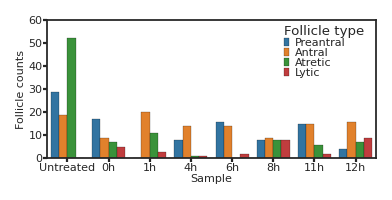

In [36]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.4,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "count", x = "Sample", hue="Follicle_type",  dodge=True, palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black")
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.5, markerscale = 0.6, title = "Follicle type",
           labelspacing = 0.0, frameon = False,  title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (0.97, 0.98))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,60)
ax.set_ylabel("Follicle counts", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/follicle_type_stats.pdf")

In [37]:
freq_table = mode_df.groupby(['FollicleNumber', 'Sample', 'Follicle_type']).size().reset_index(name='count')
freq_table['mean_size'] = mode_df.groupby(["FollicleNumber", 'Sample', 'Follicle_type'])['size'].mean('mean').values
freq_table = freq_table[freq_table["count"] > 0]
req_table = freq_table[~freq_table["Follicle_type"].isin(["Transitioning"])]
freq_table['total_count'] = freq_table.groupby(["Sample"])['count'].transform('sum')
freq_table['proportion'] = freq_table['count'] / freq_table['total_count']
freq_table["Sample"] = freq_table["Sample"].cat.reorder_categories(["Immature", "0hr", "1hr", "4hr", "6hr", "8hr", "11hr", "12hr"])
freq_table["Sample"] = freq_table["Sample"].cat.rename_categories({"Immature": "Untreated", "0hr": "0h", "1hr": "1h", "4hr": "4h", "6hr": "6h", "8hr": "8h", "11hr": "11h", "12hr": "12h"})
freq_table["Follicle_type"] = freq_table["Follicle_type"].astype("category")
# freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.remove_categories(["Transitioning"])
freq_table["Follicle_type"] = freq_table["Follicle_type"].cat.reorder_categories(["Preantral", "Antral", "Atretic", "Lytic"])

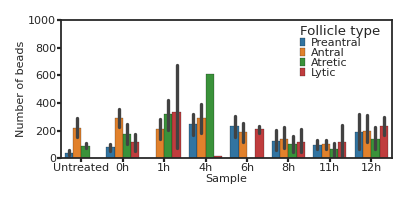

In [38]:
sc.settings.set_figure_params(dpi=80, fontsize=5, facecolor='white', frameon=False, figsize=(2.0, 2.0), vector_friendly = False, transparent=True, format="pdf")
sns.set_style("ticks")
fig, ax = plt.subplots(figsize = (2.5,1.2))
plt.margins(x=0, y=0)
ax.tick_params(axis='both', which='major', pad=0, size = 2)
sns.barplot(freq_table, y = "mean_size", x = "Sample", dodge=True, hue="Follicle_type", palette="tab10", ax=ax, 
           linewidth=0.1, edgecolor="black", errwidth = 1.5)
plt.legend(ncol=1, prop={'size': 5}, handletextpad=0.5, markerscale = 0.6, title = "Follicle type",
           labelspacing = 0.0, frameon = False,  title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, bbox_to_anchor = (0.97, 0.98))
plt.rcParams['legend.title_fontsize'] = 9
ax.set_ylim(0,1000)
ax.set_ylabel("Number of beads", labelpad = 1.0)
ax.set_xlabel("Sample", labelpad = 0.5)
plt.tight_layout()
plt.savefig("./figures/follicle_type_mean_stats.pdf")

In [39]:
granulosa_mural.obs = granulosa_mural.obs.join(mode_df.set_index('FollicleNumber').drop(columns=["Sample", "size"]), on='FollicleNumber')
granulosa_mural.obs["Follicle_type"] = granulosa_mural.obs["Follicle_type"].astype("category")
granulosa_mural.obs["Follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral',  'Antral', 'Atretic', 'Lytic'], inplace = True)

/tmp/ipykernel_1696733/2925937998.py:3: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  granulosa_mural.obs["Follicle_type"].cat.reorder_categories(


In [40]:
granulosa_mural.write_h5ad("./../../pyobjs_github/granulosa_mural.h5ad")

In [41]:
granulosa_mural = sc.read_h5ad("./../../pyobjs_github/granulosa_mural.h5ad")
granulosa_mural.shape

(54508, 31053)

In [42]:
follicle_map = sc.read_h5ad("./../../pyobjs_github/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]
granulosa.obs["FollicleNumber"] = follicle_map
granulosa.obs = granulosa.obs.join(mode_df.set_index('FollicleNumber').drop(columns=["Sample", "size"]), on='FollicleNumber')
granulosa.obs["Follicle_type"] = granulosa.obs["Follicle_type"].astype("category")
granulosa.obs["Follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral',  'Antral', 'Atretic', 'Lytic'], inplace = True)

/tmp/ipykernel_1696733/1459722696.py:5: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  granulosa.obs["Follicle_type"].cat.reorder_categories(


In [44]:
granulosa.write_h5ad("./../../pyobjs_github/granulosa1.h5ad")

In [46]:
granulosa = sc.read_h5ad("./../../pyobjs_github/granulosa1.h5ad")
granulosa.shape

(58038, 31053)

In [50]:
follicle_adata_temp = granulosa[granulosa.obs["Follicle_type"].isin(["Preantral", "Antral"])]
follicle_adata_temp.obs["FollicleNumber"] = follicle_adata_temp.obs["FollicleNumber"].astype("category")
sc.tl.dendrogram(follicle_adata_temp, groupby= "FollicleNumber", optimal_ordering=True)

/tmp/ipykernel_1696733/3943723738.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  follicle_adata_temp.obs["FollicleNumber"] = follicle_adata_temp.obs["FollicleNumber"].astype("category")


In [51]:
follicle_adata_temp.uns['dendrogram_FollicleNumber']['categories_ordered'].reverse()

(40834, 64)
(8, 213)


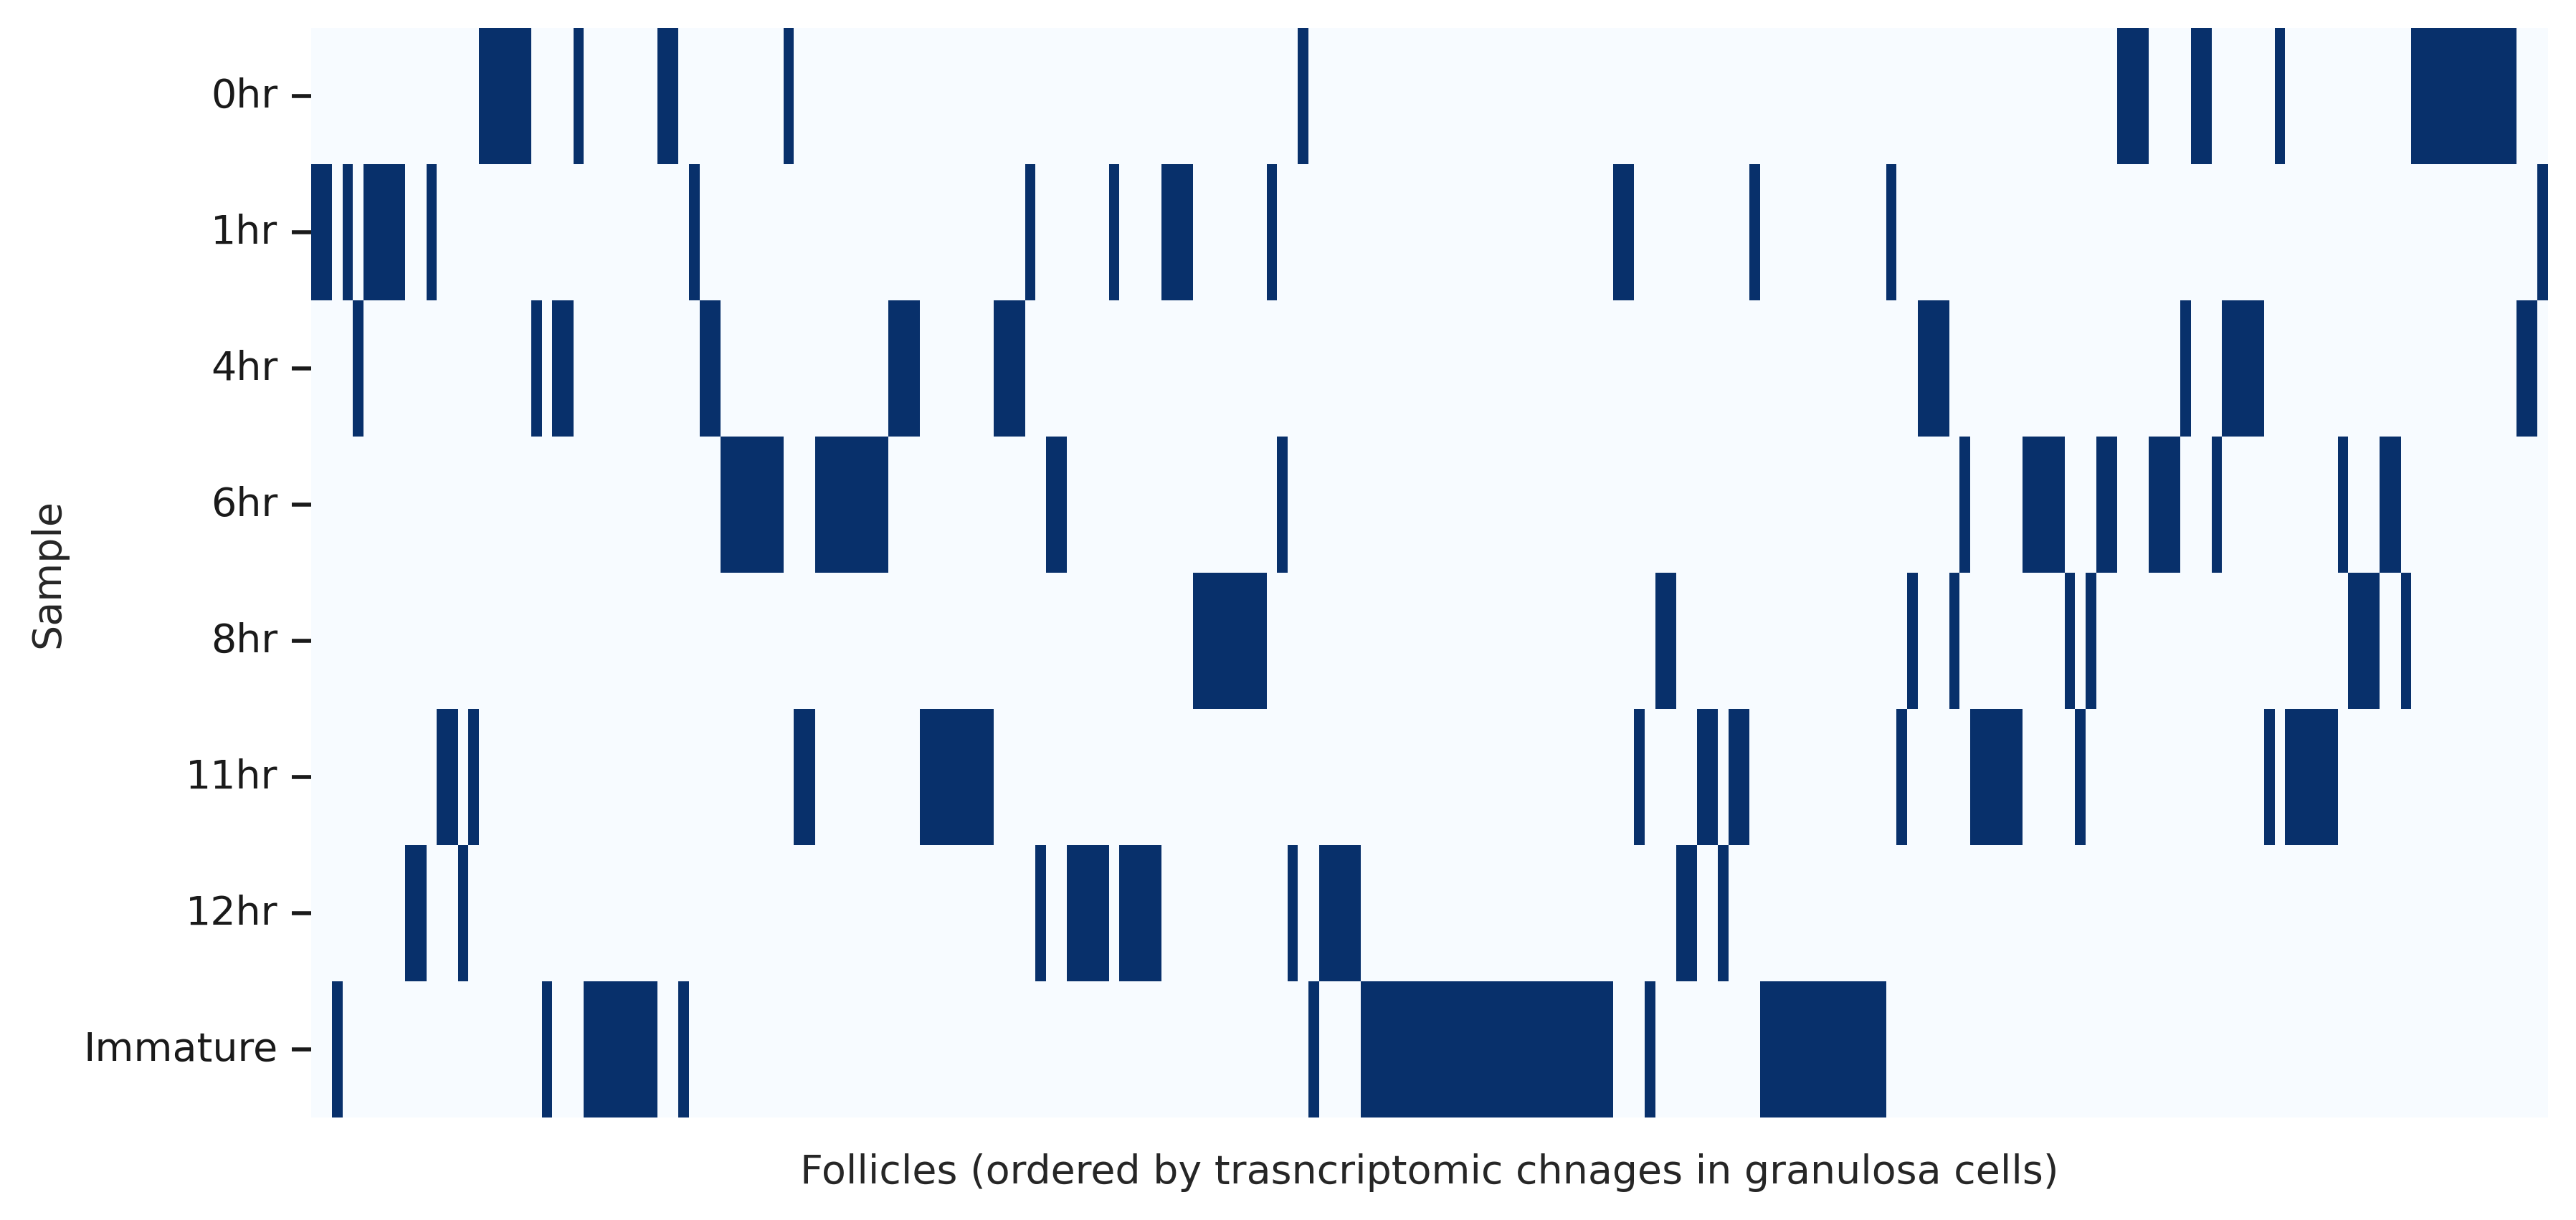

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=10, frameon=True, figsize=(10, 5))

df = pd.DataFrame(follicle_adata_temp.obs)
# df["cellID"] = df.index
# df = df[~pd.isna(df["dpt_pseudotime"])]
# df = df[~pd.isna(df["Follicle_pseudotime"])]
# sorted_df = df.sort_values(by=["Follicle_pseudotime"], ascending=True)
print(df.shape)
# print(sorted_df.shape)

freq_table = pd.crosstab(df["Sample"], df['FollicleNumber'], dropna=False).astype("bool")
# freq_table = freq_table[pd.unique(sorted_df["FollicleNumber"])]
freq_table = freq_table[follicle_adata_temp.uns['dendrogram_FollicleNumber']['categories_ordered']]
print(freq_table.shape)
# freq_table = freq_table.iloc[:,1:100]

sns.heatmap(freq_table, xticklabels=False, linewidths=0, cbar=False, cmap="Blues")
# plt.title()
plt.ylabel('Sample')
plt.xlabel('Follicles (ordered by trasncriptomic chnages in granulosa cells)')
plt.yticks(rotation=0)
plt.savefig("./figures/follicle_heatmap.pdf")

In [55]:
granulosa_mural = sc.read_h5ad("./../../pyobjs_github/granulosa_mural.h5ad")
granulosa_mural.shape

(54508, 31053)

In [57]:
# Load your anndata object
adata = sc.read_h5ad("./../../pyobjs_github/adata_ovary_combined_raw_counts_filtered.h5ad")
adata = adata[granulosa_mural.obs_names]
adata.obs = granulosa_mural.obs
print(adata.shape)

# Set the categorical metadata variable to use for pseudobulk matrix construction
metadata_variable = 'FollicleNumber'

# Get the unique values of the metadata variable
adata.obs[metadata_variable] = adata.obs[metadata_variable].astype(str)
metadata_values = np.unique(adata.obs[metadata_variable])

# Initialize an empty dictionary to store the pseudobulk matrices
pseudobulk_dfs = list()

# Loop over each metadata value and create a pseudobulk matrix for each subset of cells
for metadata_value in metadata_values:
    if metadata_value == "nan": 
        continue
    # Subset the anndata object based on the metadata variable
    subset_indices = np.where(adata.obs[metadata_variable] == metadata_value)[0]
    subset_adata = adata[subset_indices, :]

    # Calculate mean expression for each gene across all cells in the subset
    mean_expression = np.sum(subset_adata.X, axis=0)

    # Create a dataframe with gene names as row names and mean expression values as a single column
    pseudobulk_dfs.append(pd.DataFrame(data=mean_expression.T, index=adata.var_names, columns=[metadata_value]))
    
# Create a merged df with pseudobulk expression
pseudobulk_df = pseudobulk_dfs[0].join(pseudobulk_dfs[1:])
print(pseudobulk_df.shape)
del pseudobulk_dfs

(54508, 31053)
(31053, 335)


In [62]:
print(pseudobulk_df.shape)
pseudobulk_df.to_csv("./../../mouse_ovulation/csvs/granulosa_mural_pseudobulk.csv")

(31053, 335)


In [60]:
mode_df = pd.read_csv("./../../mouse_ovulation/csvs/follicle_metadata.csv", index_col=0)
print(mode_df.shape)
mode_df.columns

(335, 4)


Index(['FollicleNumber', 'Follicle_type', 'Sample', 'size'], dtype='object')

In [64]:
pseudobulk_df = pd.read_csv("./../../mouse_ovulation/csvs/granulosa_mural_pseudobulk.csv", index_col=0)
pseudobulk_df

,Follicle0,Follicle1,Follicle10,Follicle100,Follicle101,Follicle102,Follicle103,Follicle104,Follicle105,Follicle106,...,Follicle90,Follicle91,Follicle92,Follicle93,Follicle94,Follicle95,Follicle96,Follicle97,Follicle98,Follicle99
Xkr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm1992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gm37381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rp1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sox17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC168977.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AC149090.1,0.0,15.0,1.0,2.0,3.0,4.0,1.0,4.0,2.0,10.0,...,1.0,2.0,1.0,1.0,1.0,4.0,5.0,0.0,1.0,0.0
CAAA01118383.1,3.0,6.0,3.0,0.0,6.0,3.0,0.0,1.0,4.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
Vmn2r122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
mode_df = granulosa_mural.obs.groupby('FollicleNumber')[['Follicle_type', "Sample"]].apply(lambda x: x.mode()).reset_index()
mode_df["total_counts"] = granulosa_mural.obs.groupby('FollicleNumber')['total_counts'].apply(lambda x: x.sum()).reset_index()["total_counts"]
mode_df = mode_df.drop('level_1', axis=1)
mode_df = mode_df.drop_duplicates(subset='FollicleNumber', keep='first')
mode_df = mode_df.set_index(mode_df["FollicleNumber"])
print(mode_df.shape)

(336, 4)


In [66]:
mode_df = mode_df[~pd.isna(mode_df.Follicle_type)]
mode_df.shape

(335, 4)

In [67]:
import anndata as ad
pseudobulk_df_filtered = pseudobulk_df[mode_df.index]
granulosa_mural_bulk = ad.AnnData(X=pseudobulk_df_filtered.T)
granulosa_mural_bulk.obs = mode_df.loc[granulosa_mural_bulk.obs_names,]
granulosa_mural_bulk.obs["ngenes_counts"] = np.sum(pseudobulk_df_filtered != 0.0,)

In [70]:
granulosa_mural_bulk.obs["Sample"] = granulosa_mural_bulk.obs["Sample"].cat.reorder_categories(list(samples_dict.keys()))

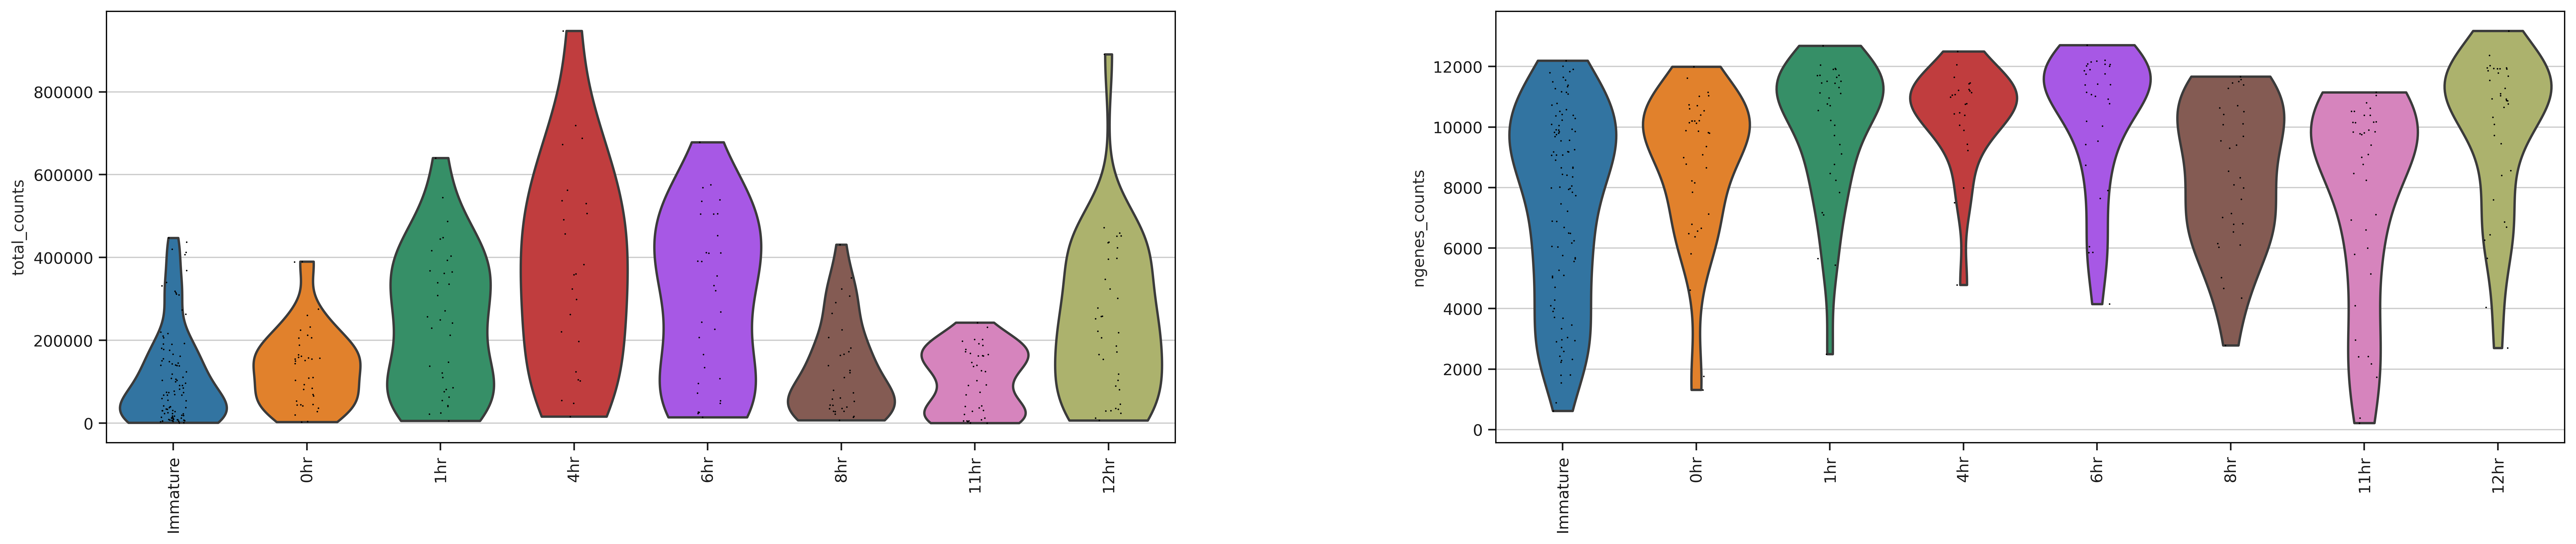

In [71]:
sc.pl.violin(granulosa_mural_bulk, keys=["total_counts", "ngenes_counts"], groupby="Sample", rotation=90)

In [72]:
granulosa_mural_bulk[granulosa_mural_bulk.obs["Sample"] == "12hr"].obs["Follicle_type"].value_counts()

Antral       16
Lytic         9
Atretic       7
Preantral     4
Name: Follicle_type, dtype: int64

In [74]:
granulosa_mural_bulk.write_h5ad("./../../pyobjs_github/granulosa_mural_bulk_raw_counts.h5ad")

In [75]:
granulosa_mural_bulk.uns['log1p'] = {'base' : None}
sc.tl.rank_genes_groups(granulosa_mural_bulk, groupby="Follicle_type", key_added="rank_gene_groups_Follicle_type", pts=True)
sc.tl.dendrogram(granulosa_mural_bulk, "Follicle_type")

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:418: RuntimeWarning: overflow encountered in expm1
  self.expm1_func(mean_rest) + 1e-9
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: invalid value encountered in divide
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:420: RuntimeWarning: divide by zero encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:417: RuntimeWarning: overflow encountered in expm1
  foldchanges = (self.expm1_func(mean_group) + 1e-9) / (
/home/mm2937/.local/lib/python3.9/site-packages/scanpy/too

In [76]:
result = granulosa_mural_bulk.uns['rank_gene_groups_Follicle_type']
groups = result['names'].dtype.names
dge_results = pd.DataFrame(
    {group + '_' + key: result[key][group]
    for group in groups for key in ['names', "logfoldchanges", "pvals_adj"]}).head(30)
dge_results

,Preantral_names,Preantral_logfoldchanges,Preantral_pvals_adj,Antral_names,Antral_logfoldchanges,Antral_pvals_adj,Atretic_names,Atretic_logfoldchanges,Atretic_pvals_adj,Lytic_names,Lytic_logfoldchanges,Lytic_pvals_adj
0,Pln,3.512559,0.000003,Hif1a,74.759216,6.724619e-22,Pik3ip1,15.561045,2.990736e-10,Lrrn1,51.996933,0.000085
1,Gdpd2,7.710475,0.000040,Igsf3,63.503586,2.377742e-21,Tex14,17.520227,2.096633e-08,Plin4,31.552473,0.000097
2,Spon1,7.696064,0.000201,Pgk1,184.882706,1.337542e-21,Col9a2,22.422064,3.380876e-08,Cemip,69.092819,0.000108
3,Shbg,2.006495,0.001222,Tcf4,71.725014,6.724619e-22,Gstt1,4.308264,3.356522e-08,Ptgfr,113.281807,0.000143
4,Gatm,1.938751,0.001585,Net1,38.887131,6.724619e-22,Smim5,3.963047,6.764145e-08,Tns3,42.067493,0.000156
5,E330013P04Rik,2.111584,0.002698,Adipor2,80.765686,2.377742e-21,Omd,8.204207,3.573142e-08,Prcd,9.820009,0.000158
6,Tmem171,2.914561,0.003535,Lpcat3,22.639950,6.724619e-22,Itih2,9.783246,6.809092e-08,Ptgds,26.278347,0.000169
7,Crip3,1.768890,0.004713,Acsbg1,209.927231,2.377742e-21,Tdrd5,48.777046,3.717859e-08,Slc16a2,25.719305,0.000177
8,Tmem174,2.024136,0.005509,Clint1,35.633549,3.179476e-21,Nos2,4.579866,5.104091e-08,Gm2a,244.410080,0.000195
9,Klhl31,2.710378,0.006463,Pkm,112.422539,6.724619e-22,Gm42303,3.186219,6.845958e-08,Cdkn2b,7.158404,0.000198


/home/mm2937/.local/lib/python3.9/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


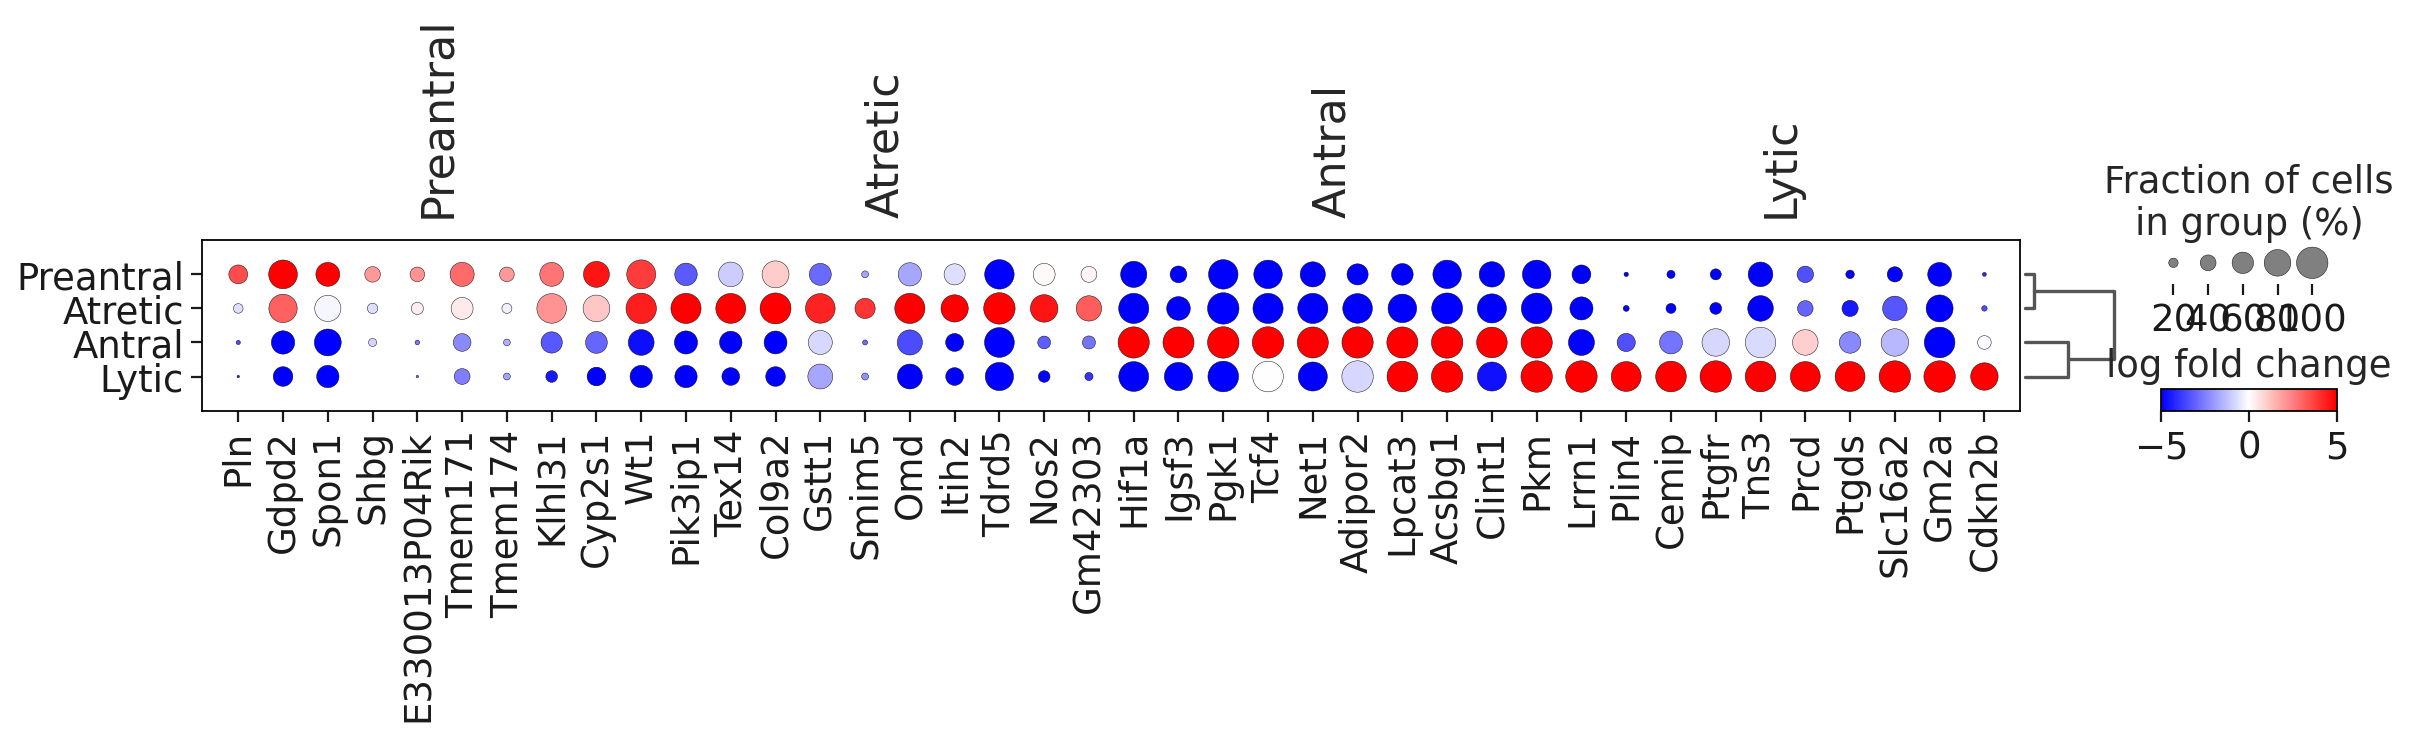

In [77]:
sc.settings.set_figure_params(dpi=80, fontsize=20, facecolor='white', frameon=True, figsize=(5, 5))
sc.pl.rank_genes_groups_dotplot(granulosa_mural_bulk, n_genes=10, key="rank_gene_groups_Follicle_type", values_to_plot='logfoldchanges', cmap='bwr', min_logfoldchange=2.0, vmax=5, vmin=-5)
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(2, 2))

In [78]:
granulosa_mural_bulk.write_h5ad("./../../pyobjs_github/granulosa_mural_bulk.h5ad")

In [79]:
granulosa_mural_bulk = sc.read_h5ad("./../../pyobjs_github/granulosa_mural_bulk.h5ad")

In [80]:
# granulosa_mural_bulk = granulosa_mural_bulk[granulosa_mural_bulk.obs["Follicle_type"].isin(["Preantral"])]
granulosa_mural_bulk.obs["FollicleNumber"] = granulosa_mural_bulk.obs["FollicleNumber"].astype("category")
sc.tl.dendrogram(granulosa_mural_bulk, groupby= "FollicleNumber", optimal_ordering=True)

(335, 5)
(8, 335)


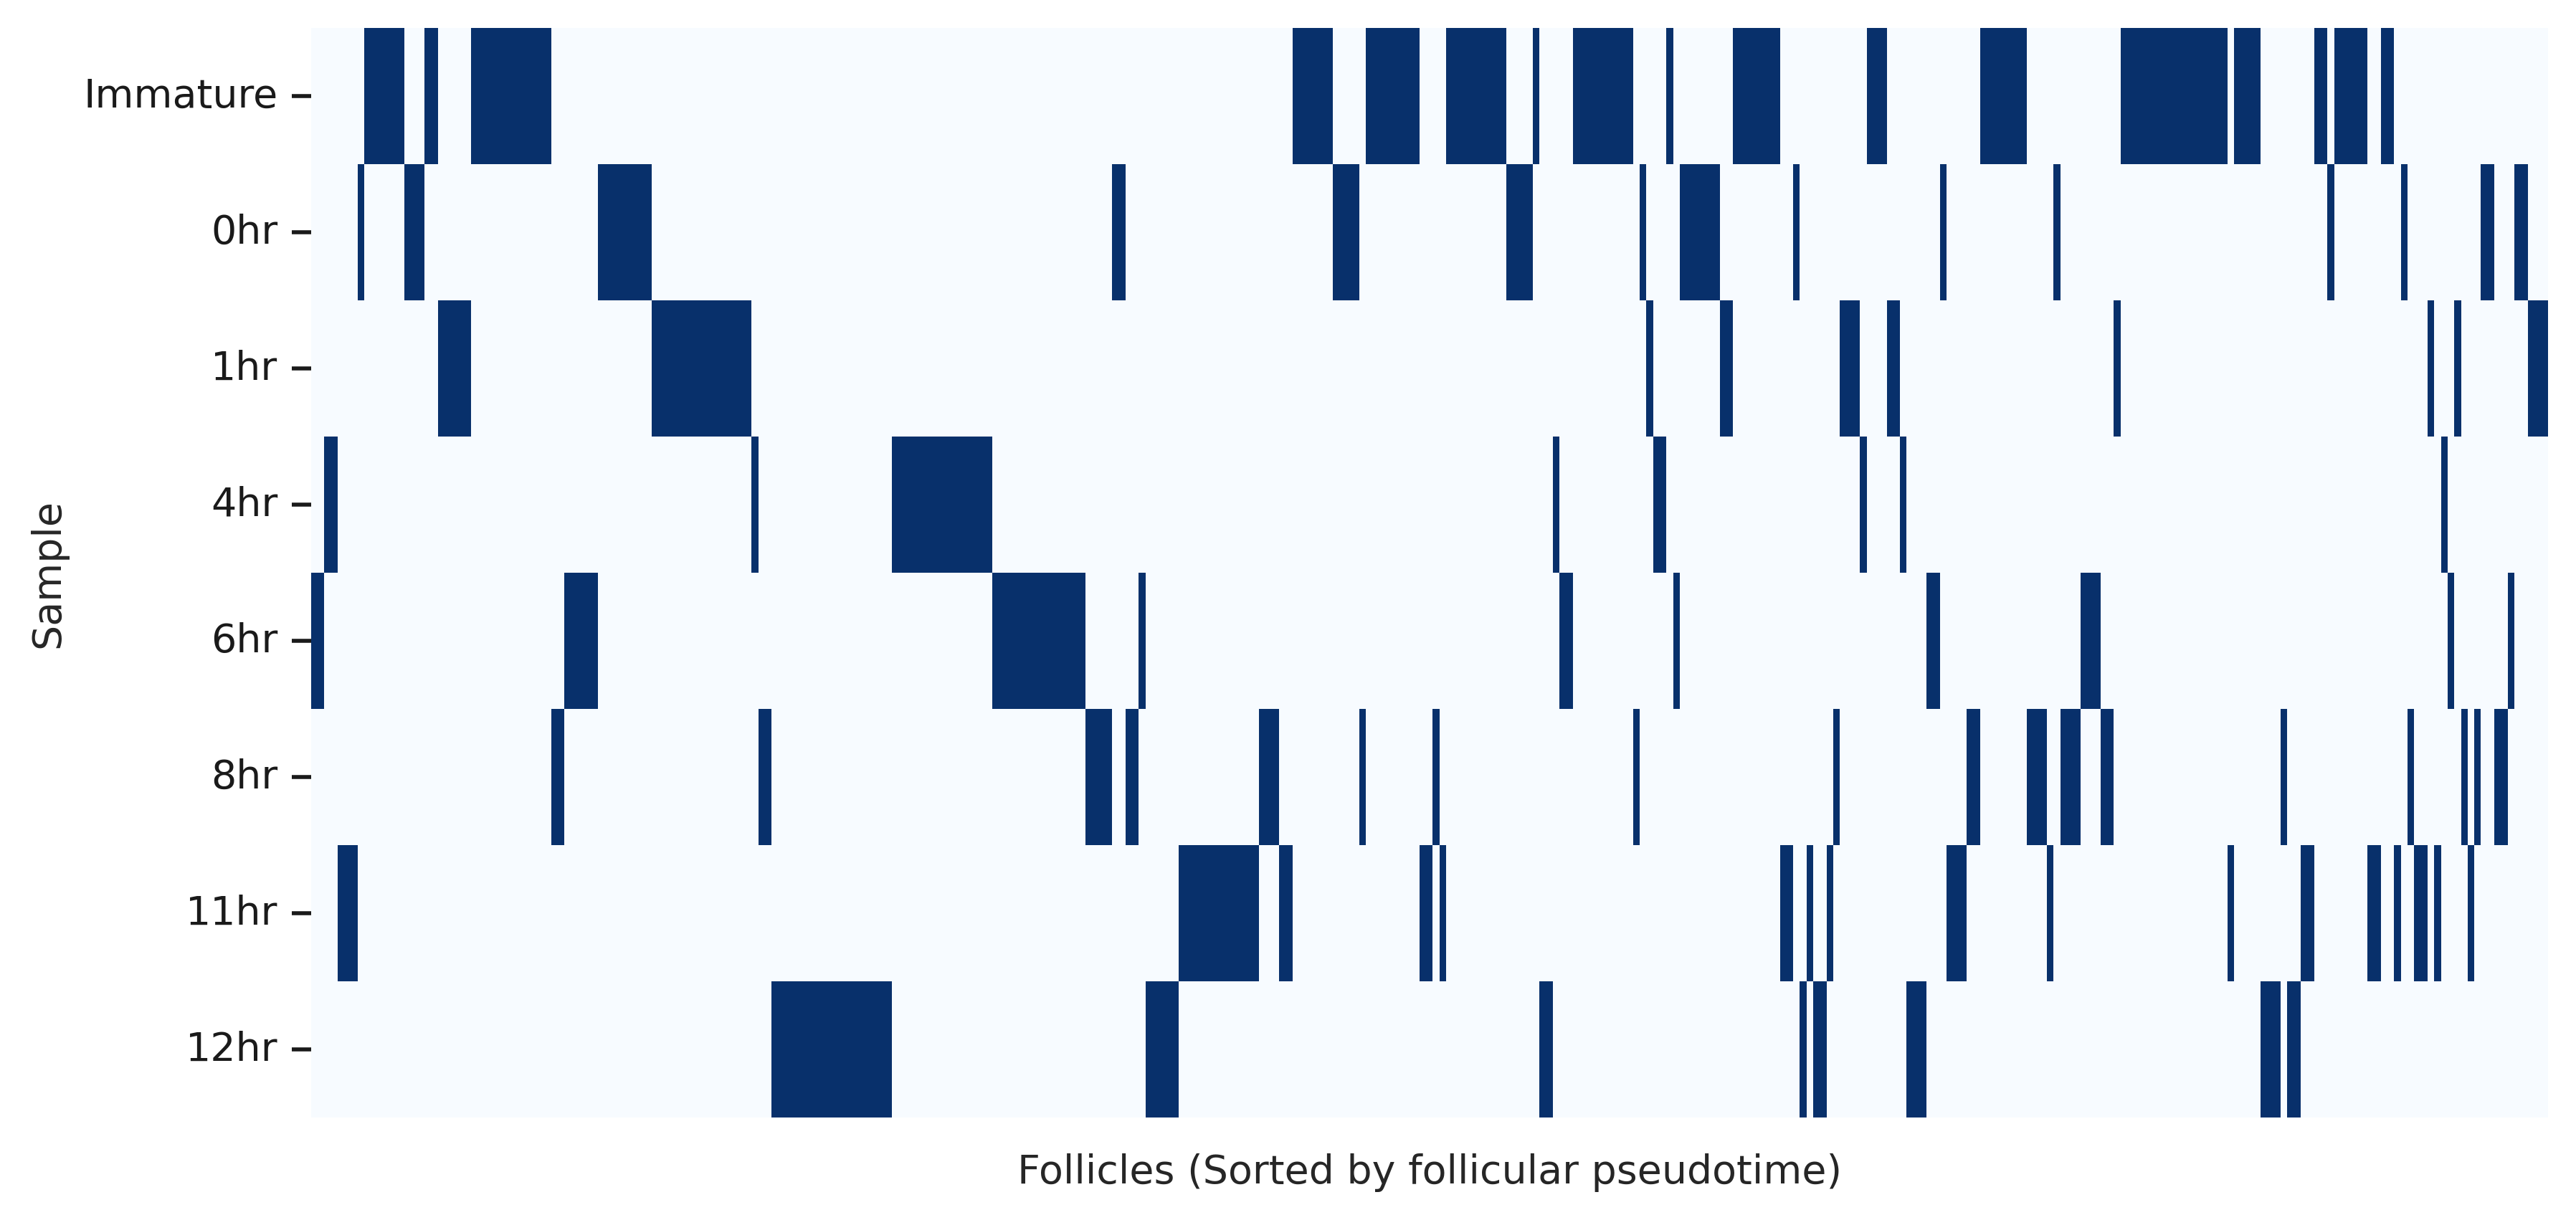

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sc.settings.set_figure_params(dpi=200, facecolor='white', fontsize=10, frameon=True, figsize=(10, 5))

df = pd.DataFrame(granulosa_mural_bulk.obs)
# df["cellID"] = df.index
# df = df[~pd.isna(df["dpt_pseudotime"])]
# df = df[~pd.isna(df["Follicle_pseudotime"])]
# sorted_df = df.sort_values(by=["Follicle_pseudotime"], ascending=True)
print(df.shape)
# print(sorted_df.shape)

freq_table = pd.crosstab(df["Sample"], df['FollicleNumber'], dropna=False).astype("bool")
# freq_table = freq_table[pd.unique(sorted_df["FollicleNumber"])]
freq_table = freq_table[granulosa_mural_bulk.uns['dendrogram_FollicleNumber']['categories_ordered']]
print(freq_table.shape)
# freq_table = freq_table.iloc[:,1:100]

sns.heatmap(freq_table, xticklabels=False, linewidths=0, cbar=False, cmap="Blues")
# plt.title()
plt.ylabel('Sample')
plt.xlabel('Follicles (Sorted by follicular pseudotime)')
plt.yticks(rotation=0)
plt.show()